In [41]:
#importing libraries

import pandas as pd
import numpy as np
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import string
import os
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import nltk
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, SpatialDropout1D, LSTM

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
#import dataset

df=pd.read_csv("D:\EXTRAS\KAGGLE\Twitter_Data.csv")


In [43]:
#EDA-understanding and exploring the data

In [44]:
df.shape

(162980, 2)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [46]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [47]:
df.category.unique()


# -1 is negative
# 0 is neutral
# +1 is positive

array([-1.,  0.,  1., nan])

In [48]:
# df['clean_text'].duplicated().sum()

In [49]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [50]:
#drop null values from the data

df.drop(df[df['clean_text'].isna()].index, inplace=True)
df.drop(df[df['category'].isna()].index, inplace=True)

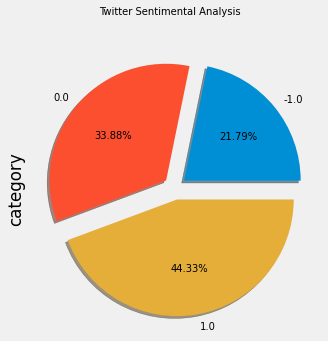

In [51]:
fig = plt.figure(figsize=(5,5))
fig.suptitle('Twitter Sentimental Analysis', fontsize=10)
df.category.value_counts(sort=False).plot.pie(textprops={'fontsize': 10},shadow=True,explode=(0.1, 0.1, 0.1), autopct='%1.2f%%')
plt.show()

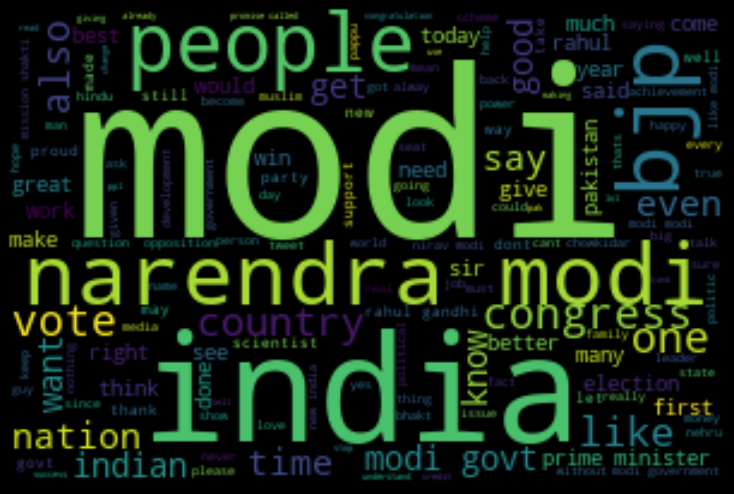

In [52]:
# positive tweets

text = ''

for tweet in df[df['category'] == 1.0]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(
width=300, height=200, background_color='black',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(10,10), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text

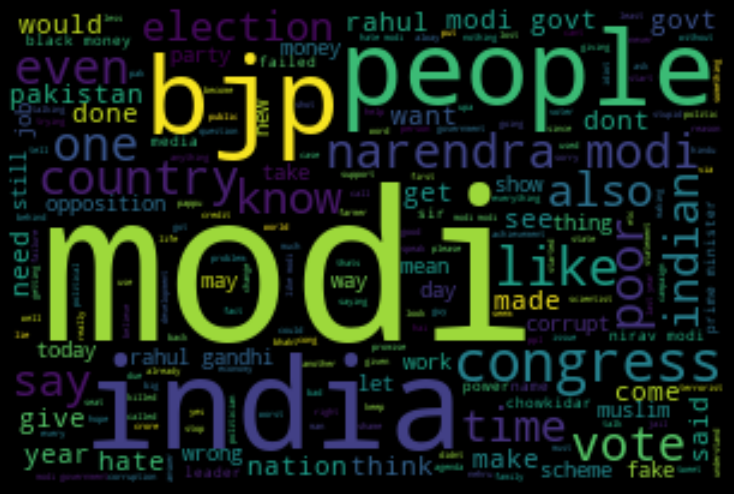

In [53]:
# negative tweets

text = ''

for tweet in df[df['category'] == -1.0 ]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(
width=300, height=200, background_color='black',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(10,10), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text

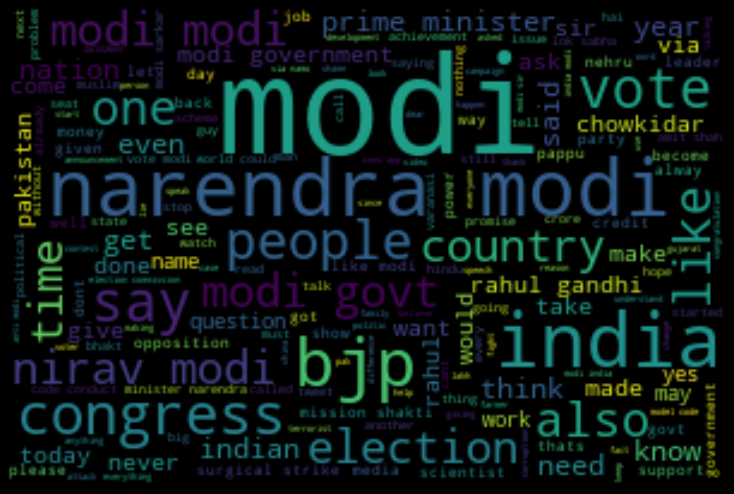

In [54]:
# neutral tweets

text = ''

for tweet in df[df['category'] == 0.0 ]['clean_text']:
    text += f" {tweet}"
    
wordcloud = WordCloud(
width=300, height=200, background_color='black',
stopwords = set(nltk.corpus.stopwords.words("english"))).generate(text)

fig = plt.figure(figsize=(10,10), facecolor='k',edgecolor='k')

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

del text